In [6]:
#imports
import matplotlib.pyplot as plt
import networkx as nx
from igraph import *
from tkinter import *
from functools import partial
import numpy as np

In [111]:
def chamar_tela_login():
    tela_login = Tk() 
    tela_login.geometry("500x300+300+200") #dimensoes da janela --> Largura x Altura + DistanciaDaMargemEsquerda + DistanciaDaMargemSuperior
    tela_login.title("Tópicos Especiais em Engenharia de Computação 2") #título da janela
    
    lb_inicial = Label (tela_login, text="Simulação", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) #criando rótulo
    lb_login = Label(tela_login, text="Número de nós:", bg="white").place(x=110, y=130)
    lb_senha = Label(tela_login, text="Número de enlaces:", bg="white").place(x=110, y=180)
    
    entrada_login = Entry(tela_login, width=30, bg="white")
    entrada_login.place(x=110, y=150)
    
    entrada_senha = Entry(tela_login, width=30, bg="white")
    entrada_senha.place(x=110, y=200)
    
    bt_logar = Button(tela_login, width=10, bg="white", text="Confirmar", command=partial(escolhe_tela, tela_login, entrada_login, entrada_senha)).place(x=275, y=230)
    tela_login.mainloop()

def escolhe_tela(tela_anterior, nos, enlaces):
    chamar_tela_inicial(tela_anterior, nos.get(), enlaces.get())
    
def chamar_tela_inicial(tela_anterior, n_nos, n_enlaces):
    tela_inicial = Tk() #criacao de uma janela - instancia de Tk
    tela_inicial.geometry("500x300+300+200") #dimensoes da janela --> Largura x Altura + DistanciaDaMargemEsquerda + DistanciaDaMargemSuperior
    tela_inicial.title("Tópicos Especiais em Engenharia de Computação 2") #título da janela
    
    lb_inicial = Label (tela_inicial, text="Simulação Parte 2", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) #criando rótulo
    
    vetor_dist = []
    vetor_lb_no_A = []
    vetor_lb_no_B = []

    for i in range(1, int(n_enlaces) + 1):
        entrada_dist = Entry(tela_inicial, width=30, bg="white")
        entrada_dist.place(x=110, y=20*i + 150)
        vetor_dist.append(entrada_dist)
        
        entrada_lb_A = Entry(tela_inicial, width=30, bg="white")
        entrada_lb_A.place(x=310, y=20*i + 150)
        vetor_lb_no_A.append(entrada_lb_A)
        
        entrada_lb_B = Entry(tela_inicial, width=30, bg="white")
        entrada_lb_B.place(x=510, y=20*i + 150)
        vetor_lb_no_B.append(entrada_lb_B)
        
    bt_cadastrar = Button (tela_inicial, width=20, text="Cadastrar", command = partial(show_entry, tela_inicial, n_nos, n_enlaces, vetor_dist, vetor_lb_no_A, vetor_lb_no_B), bg="white").pack() #criando botao "cadastrar"
    tela_anterior.destroy()
    
def show_entry(tela_anterior, n_nos, n_enlaces, vetor_dist, vetor_lb_no_A, vetor_lb_no_B):
    print(vetor_dist[0].get(), vetor_dist[1].get(), vetor_dist[2].get())
    print(vetor_lb_no_A[0].get(), vetor_lb_no_A[1].get(), vetor_lb_no_A[2].get())
    print(vetor_lb_no_B[0].get(), vetor_lb_no_B[1].get(), vetor_lb_no_B[2].get())
    
    labels = []
    dists = []
    dists.append([int(x.get()) for x in vetor_dist])
    labels.append([x.get() for x in vetor_lb_no_A])
    labels.append([x.get() for x in vetor_lb_no_B])
        
    labels = np.unique(labels)
        
    g = Graph(int(n_nos))
    g.vs["label"]=labels
    g.es["weight"]=dists[0]
    
    for i in range(int(n_enlaces)):
        g.add_edge(ord(vetor_lb_no_A[i].get()) - ord('a'), ord(vetor_lb_no_B[i].get()) - ord('a'))
    
    print(g)
    print(labels)
    print(dists[0])
    
    tela_anterior.destroy()

if __name__ == "__main__":

    chamar_tela_login()

1 2 3
a b c
b c a
IGRAPH U-W- 3 3 --
+ attr: label (v), weight (e)
+ edges:
0--1 1--2 0--2
['a' 'b' 'c']
[1, 2, 3]


In [113]:
g = ig.Graph(9)

g.add_edge(0,1)
g.add_edges([(0,2),(0,3),(1,2),(1,4),(2,5),(3,5),(3,6),(4,5),(4,8),
(5,6),(5,7),(6,7),(7,8)])

g.vs["label"]=["Sydney","Melbourne","Canberra","Brisbane","Adelaide", "Alice Springs","Cairns","Darwin","Perth"]

g.es["weight"]=[12, 4, 9, 6, 1, 8, 15, 31, 22, 8, 15, 32,
24, 15, 30, 48]

print(g)

shortestPaths=g.get_shortest_paths(0,weights=g.es["weight"],output="vpath")[1:]
print(shortestPaths)

# [g.vs[i]["label"] for i in shortestPaths]

IGRAPH U-W- 9 14 --
+ attr: label (v), weight (e)
+ edges:
0 -- 1 2 3       2 -- 0 1 5       4 -- 1 5 8       6 -- 3 5 7       8 -- 4 7
1 -- 0 2 4       3 -- 0 5 6       5 -- 2 3 4 6 7   7 -- 5 6 8
[[0, 2, 1], [0, 2], [0, 3], [0, 2, 1, 4], [0, 2, 5], [0, 2, 5, 6], [0, 2, 1, 4, 8, 7], [0, 2, 1, 4, 8]]


{(1, 2): Text(1.5,1.5,'0.5'), (1, 3): Text(1,0.5,'9.8')}

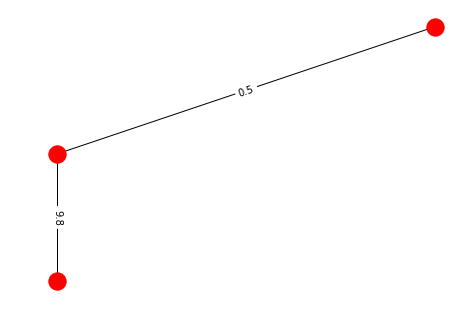

In [8]:
G=nx.Graph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
# plt.savefig(<wherever>)
